In [825]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [826]:
df = pd.read_csv('lego-sets.csv')

In [827]:
print(df.to_string()) 


                       id                                                                                   name                                          category    year   parts                                                                                         img_link                                                                                                 set_link                                                                                                                                               raw_price  mean_price
0                 21036-1                                                                        Arc de Triomphe                                      Architecture  2017.0   386.0                                                             /sets/21036-1/12061.jpg/180x180p.jpg                                                                           /sets/21036-1/arc-de-triomphe/                                                                           

In [828]:
print(df['mean_price'].describe())
print(" ")
print(df['mean_price'].median())
print(" ")
print(df['mean_price'].value_counts()) 
print(" ")
# 1834 entries have a zero! It appears the data is not there and this would throw off our 
# estimate for price per part. 
#let's remove these entries by first replacing them with nan, notice how we specifically replace that columns' data

df['mean_price'].replace(0, np.nan, inplace=True)

count    5075.000000
mean       54.548822
std       131.903937
min         0.000000
25%         0.000000
50%        10.590000
75%        54.455000
max      2206.870000
Name: mean_price, dtype: float64
 
10.59
 
mean_price
0.00      1834
3.09        11
3.97        11
29.99       11
9.99        10
          ... 
32.95        1
156.62       1
46.63        1
36.57        1
540.35       1
Name: count, Length: 2309, dtype: int64
 


In [829]:
#so now let's see if theres zeros

print(df['mean_price'].value_counts()) 

mean_price
3.09      11
29.99     11
3.97      11
9.99      10
6.00       9
          ..
79.96      1
32.95      1
156.62     1
46.63      1
540.35     1
Name: count, Length: 2308, dtype: int64


In [830]:
print(df.to_string()) 

                       id                                                                                   name                                          category    year   parts                                                                                         img_link                                                                                                 set_link                                                                                                                                               raw_price  mean_price
0                 21036-1                                                                        Arc de Triomphe                                      Architecture  2017.0   386.0                                                             /sets/21036-1/12061.jpg/180x180p.jpg                                                                           /sets/21036-1/arc-de-triomphe/                                                                           

In [831]:
#now we drop Nan
df = df.dropna()

In [832]:
#now we create price per part
df["price_per_part"] = df["mean_price"] / df["parts"] 

In [833]:
print(df.to_string()) 

                    id                                                                name                                          category    year   parts                                        img_link                                                                         set_link                                                                                                                                               raw_price  mean_price  price_per_part
0              21036-1                                                     Arc de Triomphe                                      Architecture  2017.0   386.0            /sets/21036-1/12061.jpg/180x180p.jpg                                                   /sets/21036-1/arc-de-triomphe/                                                                                                                            ['\n$73.87\n', '\n$73.87\n']       73.87        0.191373
2              21027-1                                              

In [834]:
df['price_per_part'].describe()
#there seems to be something with infinity. We will need to remove sets with 0 parts. 

/Users/christopher/miniconda3/lib/python3.11/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    3241.000000
mean             inf
std              NaN
min         0.001883
25%         0.117500
50%         0.183883
75%         0.334270
max              inf
Name: price_per_part, dtype: float64

In [835]:
df['parts'].replace(0, np.nan, inplace=True)
df = df.dropna()

In [836]:
#let's try that agian
df['price_per_part'].describe()

#mean is 0.61: wow, that is definitely higher than expected, probably outliers are playing a role.

count    3218.000000
mean        0.617683
std         3.207783
min         0.001883
25%         0.116852
50%         0.182443
75%         0.328447
max        88.470000
Name: price_per_part, dtype: float64

In [837]:
# let's filter sets that are outliers. lets see how many outliers there are
Q1 = df['price_per_part'].quantile(0.25)
Q3 = df['price_per_part'].quantile(0.75)
IQR = Q3 - Q1
higher_outlier = Q3 + (IQR * 1.5)
lower_outlier = Q1 - (IQR * 1.5)

pd.set_option('display.max_rows', 10)
df.loc[df['price_per_part'] >= higher_outlier]
#one way to list all the rows that out outliers above

id                   name                 category    year  \
2        21027-1                 Berlin  Architecture > Skylines  2016.0   
10       21002-1  Empire State Building             Architecture  2009.0   
35       21003-1   Seattle Space Needle             Architecture  2009.0   
42       21032-1                 Sydney  Architecture > Skylines  2017.0   
52       21026-1                 Venice  Architecture > Skylines  2016.0   
...          ...                    ...                      ...     ...   
5013   8862-1 v2         Backhoe Grader                  Technic  1989.0   
5037  30465-1 v1             Helicopter                  Technic  2021.0   
5050   8043-1 v2    Motorized Excavator                  Technic  2010.0   
5055   8854-1 v2            Power Crane                  Technic  1989.0   
5063   8838-1 v2            Shock Cycle                  Technic  1991.0   

       parts                              img_link  \
2      289.0  /sets/21027-1/32614.jpg/180x180p.jpg   
10      77.0  /sets/21002-1/15857.jpg/180x180p.jpg   
35      57.0   /sets/21003-1/3740.jpg/180x180p.jpg   
42     361.0  /sets/21032-1/12147.jpg/180x180p.jpg   
52     212.0  /sets/21026-1/31687.jpg/180x180p.jpg   
...      ...                                   ...   
5013   679.0   /sets/8862-1/10708.jpg/180x180p.jpg   
5037    70.0  /sets/30465-1/77998.jpg/180x180p.jpg   
5050  1127.0    /sets/8043-1/2842.jpg/180x180p.jpg   
5055   517.0   /sets/8854-1/10680.jpg/180x180p.jpg   
5063   247.0    /sets/8838-1/8409.jpg/180x180p.jpg   

                                  set_link  \
2                    /sets/21027-1/berlin/   
10    /sets/21002-1/empire-state-building/   
35     /sets/21003-1/seattle-space-needle/   
42                   /sets/21032-1/sydney/   
52                   /sets/21026-1/venice/   
...                                    ...   
5013          /sets/8862-1/backhoe-grader/   
5037             /sets/30465-1/helicopter/   
5050     /sets/8043-1/motorized-excavator/   
5055             /sets/8854-1/power-crane/   
5063             /sets/8838-1/shock-cycle/   

                                              raw_price  mean_price  \
2                        ['\n$380.00\n', '\n$380.00\n']      380.00   
10                         ['\n$49.95\n', '\n$49.95\n']       49.95   
35                       ['\n$175.00\n', '\n$175.00\n']      175.00   
42                       ['\n$242.58\n', '\n$242.58\n']      242.58   
52                       ['\n$215.41\n', '\n$215.41\n']      215.41   
...                                                 ...         ...   
5013                     ['\n$589.48\n', '\n$589.48\n']      589.48   
5037  ['\n$845.90\n', '\n$15.00\n', '\n$845.90\n', '...      430.45   
5050  ['\n$999.00\n', '\n$836.48\n', '\n$999.00\n', ...      917.74   
5055                     ['\n$589.48\n', '\n$589.48\n']      589.48   
5063                     ['\n$176.15\n', '\n$176.15\n']      176.15   

      price_per_part  
2           1.314879  
10          0.648701  
35          3.070175  
42          0.671967  
52          1.016085  
...              ...  
5013        0.868159  
5037        6.149286  
5050        0.814321  
5055        1.140193  
5063        0.713158  

[381 rows x 10 columns]

In [838]:
df.loc[df['price_per_part'] <= lower_outlier, 'price_per_part']


Series([], Name: price_per_part, dtype: float64)

In [839]:
#what about extreme outliers?
higher_extreme_outlier = Q3 + (IQR * 3)
lower_extreme_outlier = Q1 - (IQR * 3)

df.loc[df['price_per_part'] <= lower_extreme_outlier, 'price_per_part']

#nothing, probably a negative lower bound




Series([], Name: price_per_part, dtype: float64)

In [840]:
df.loc[df['price_per_part'] >= higher_extreme_outlier, 'price_per_part']

2       1.314879
35      3.070175
52      1.016085
66      2.479364
69      1.202718
          ...   
4942    1.517647
4984    5.215667
5011    1.297818
5037    6.149286
5055    1.140193
Name: price_per_part, Length: 255, dtype: float64

In [841]:
#removing these outliers
outliers = df[(df['price_per_part'] < lower_extreme_outlier) | (df['price_per_part'] > higher_outlier)]
df = df.drop(outliers.index)

print(df.to_string())

                id                                                                name                                          category    year   parts                                   img_link                                                                         set_link                                                                                                                                               raw_price  mean_price  price_per_part
0          21036-1                                                     Arc de Triomphe                                      Architecture  2017.0   386.0       /sets/21036-1/12061.jpg/180x180p.jpg                                                   /sets/21036-1/arc-de-triomphe/                                                                                                                            ['\n$73.87\n', '\n$73.87\n']       73.87        0.191373
4          21029-1                                                   Buckingham Palace

In [842]:
#so it seems price per part is about 0.20 after doing the filtering. Let's see if we can extract meaningful graphs from this

<Axes: >

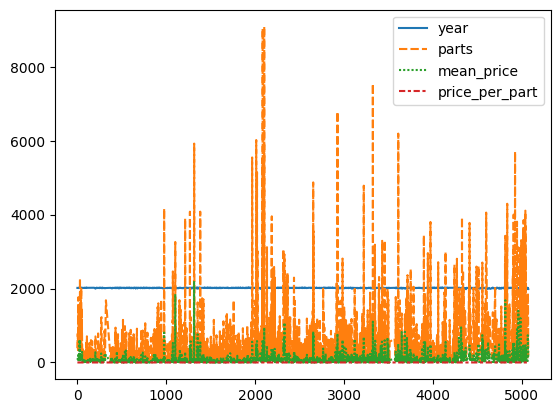

In [843]:
sns.lineplot(data=df)

In [844]:
list(df.columns)

['id',
 'name',
 'category',
 'year',
 'parts',
 'img_link',
 'set_link',
 'raw_price',
 'mean_price',
 'price_per_part']

Text(0, 0.5, 'price per part (cost of set / number of parts)')

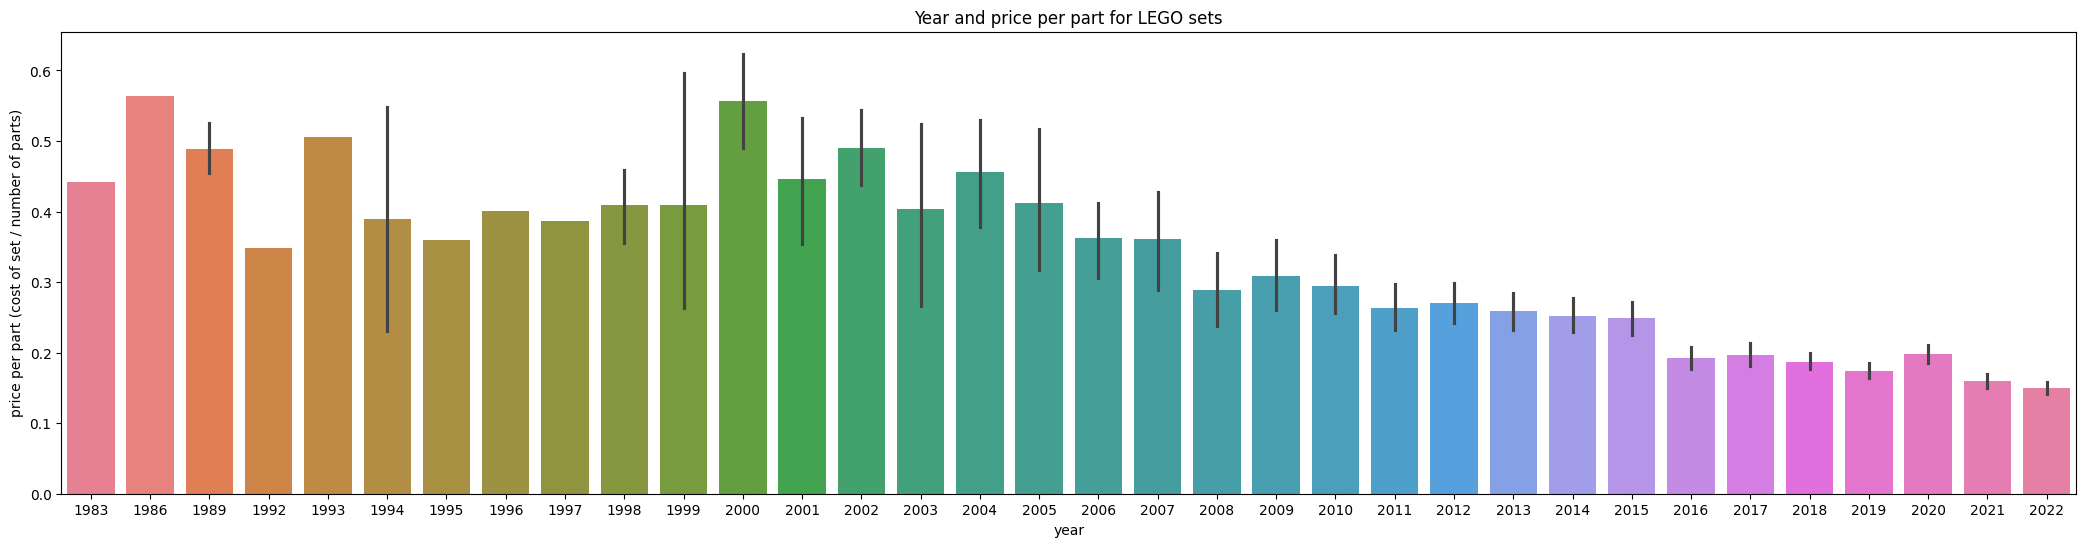

In [845]:

df = df.astype({"year":'int64'})
plt.figure(figsize=(26,6))
plt.title("Year and price per part for LEGO sets")
sns.barplot(x=df['year'], y=df['price_per_part'], hue = df['year'], legend = False, palette=sns.color_palette("husl", 34))
plt.ylabel("price per part (cost of set / number of parts)")


<Axes: xlabel='mean_price', ylabel='parts'>

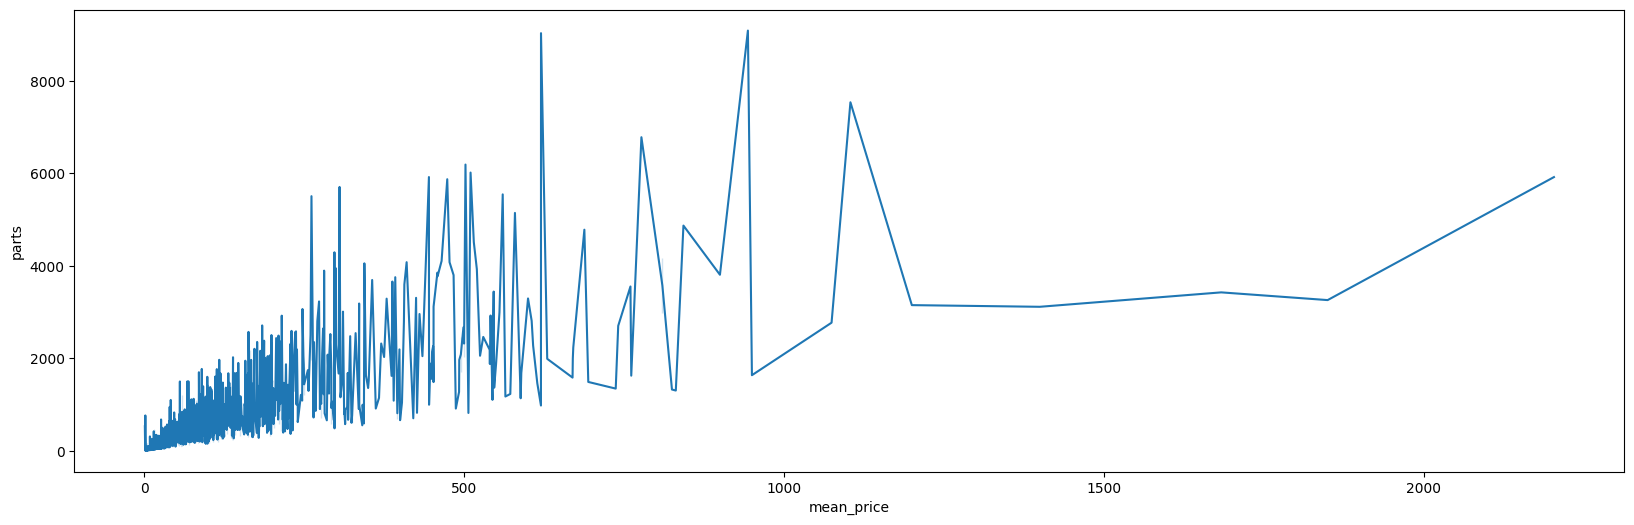

In [846]:
plt.figure(figsize=(20,6))
sns.lineplot(x=df['mean_price'], y=df['parts'])

Text(0, 0.5, 'mean price with range')

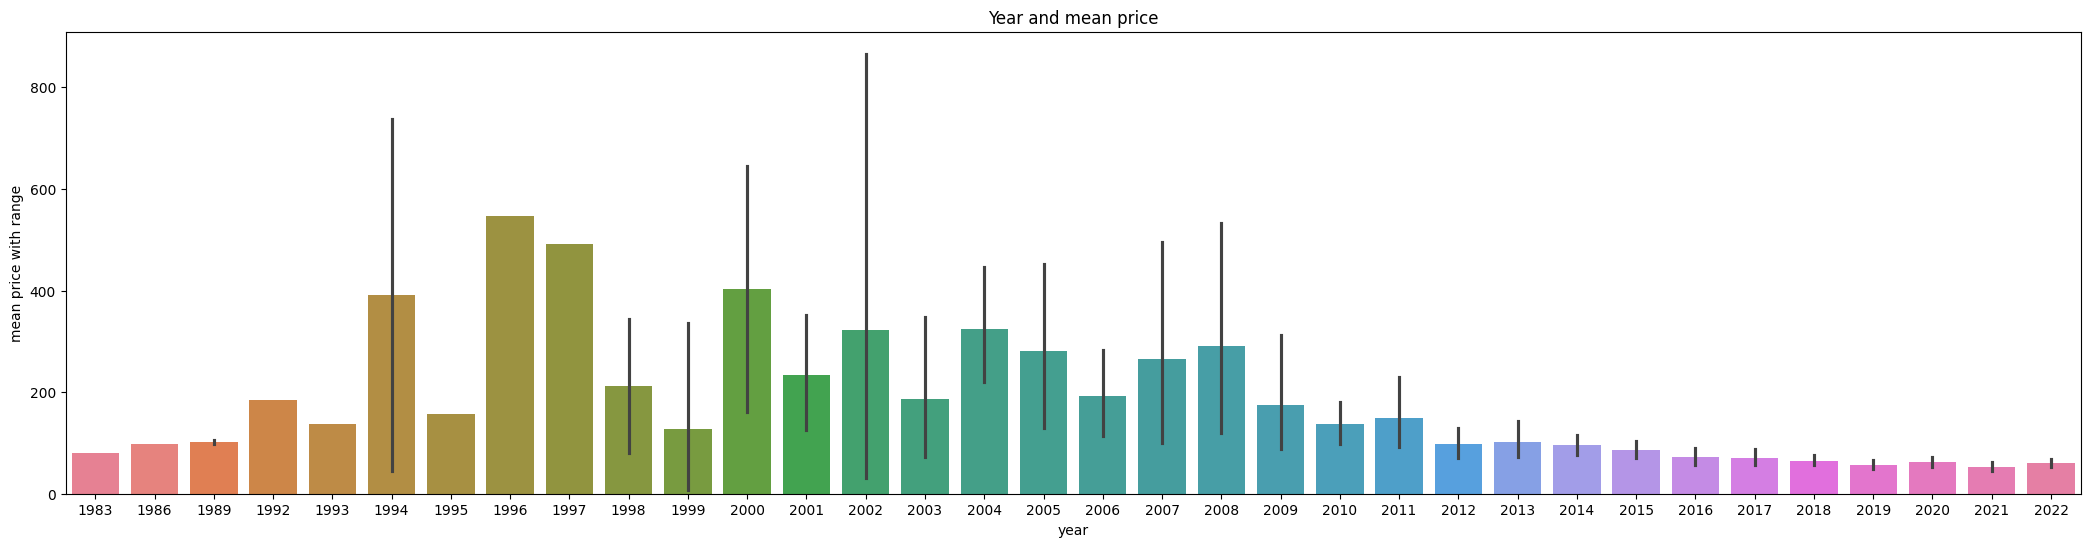

In [847]:
plt.figure(figsize=(26,6))
plt.title("Year and mean price")
sns.barplot(x=df['year'], y=df['mean_price'], hue = df['year'], legend = False, palette=sns.color_palette("husl", 34))
plt.ylabel("mean price with range")

In [849]:

df['category'].value_counts().nlargest(20)


category
Star Wars                           432
Friends                             331
Ninjago                             238
Technic                             154
City                                139
Creator > Creator 3-in-1            132
Brickheadz                          109
Super Mario                          85
City > Police                        77
Creator                              70
Minecraft                            67
Harry Potter                         65
Disney Princess                      56
Super Heroes Marvel > Avengers       55
Super Heroes DC > Batman             55
Jurassic World                       52
Super Heroes Marvel > Spider-Man     50
Super Heroes Marvel                  49
LEGO Ideas and CUUSOO                46
Speed Champions                      43
Name: count, dtype: int64

In [877]:
sub_df = df.groupby('category').filter(lambda x : len(x)>50)
print(sub_df.to_string())
sub_df['category'].value_counts()


               id                                                        name                        category  year   parts                                 img_link                                                               set_link                                                                                                                                               raw_price  mean_price  price_per_part
55        40539-1                                                 Ahsoka Tano                      Brickheadz  2022   164.0     /sets/40539-1/95789.jpg/180x180p.jpg                                             /sets/40539-1/ahsoka-tano/                                                                      ['\n$18.70\n', '\n$9.99\n', '\n$16.90\n', '\n$18.70\n', '\n$9.99\n', '\n$16.90\n']       15.20        0.092683
57        41618-1                                                 Anna & Olaf                      Brickheadz  2018   201.0     /sets/41618-1/15893.jpg/180x180p.jpg    

category
Star Wars                         432
Friends                           331
Ninjago                           238
Technic                           154
City                              139
Creator > Creator 3-in-1          132
Brickheadz                        109
Super Mario                        85
City > Police                      77
Creator                            70
Minecraft                          67
Harry Potter                       65
Disney Princess                    56
Super Heroes DC > Batman           55
Super Heroes Marvel > Avengers     55
Jurassic World                     52
Name: count, dtype: int64

Text(0, 0.5, 'mean price')

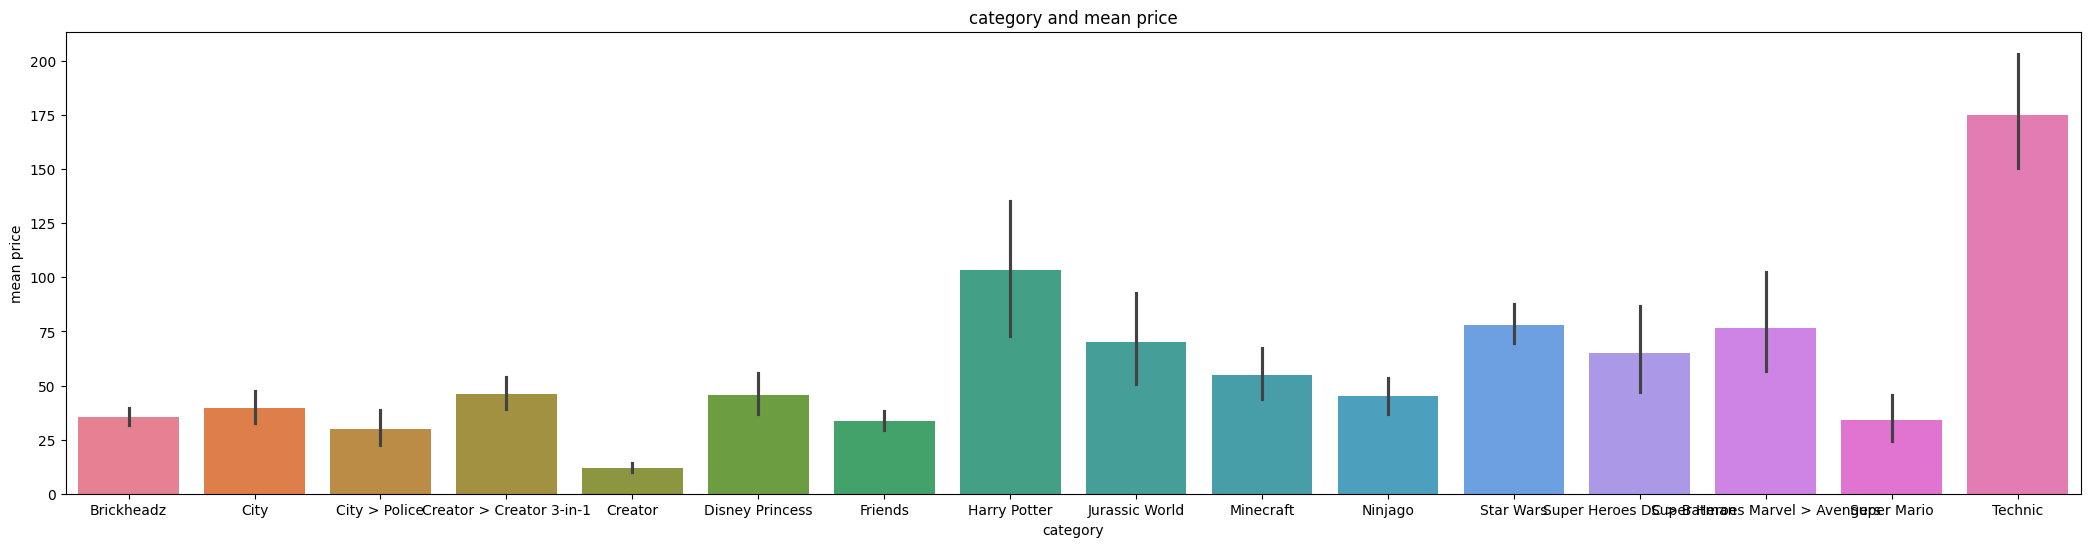

In [880]:
plt.figure(figsize=(26,6))
plt.title("category and mean price")
sns.barplot(x=sub_df['category'], y=sub_df['mean_price'], hue = sub_df['category'], legend = False, palette=sns.color_palette("husl", 16))
plt.ylabel("mean price")

Text(0, 0.5, 'price per part')

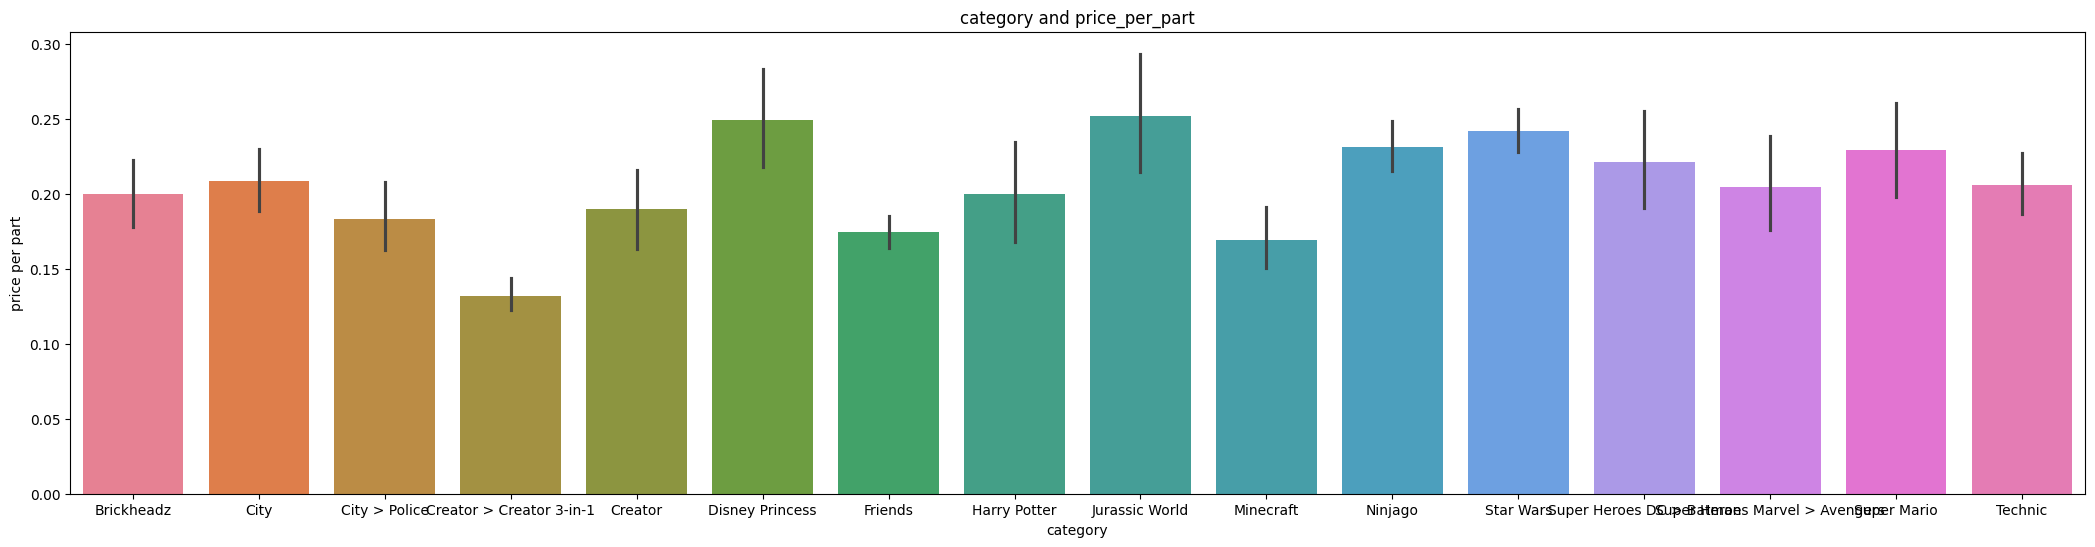

In [883]:
plt.figure(figsize=(26,6))
plt.title("category and price_per_part")
sns.barplot(x=sub_df['category'], y=sub_df['price_per_part'], hue = sub_df['category'], legend = False, palette=sns.color_palette("husl", 16))
plt.ylabel("price per part")